<a href="https://colab.research.google.com/github/lantzmurray/WrestlingChampionshipEDA/blob/main/WrestlingChampionEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Major Wrestling Championship Data  -  Exploratory Data Analysis

Import Libaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Import our first table of data

In [2]:
url = 'https://www.cagematch.net/?id=5&nr=20&page=3'

In [3]:
wwetitledata = pd.read_html(url)

Let's see how it looks as a dataframe

In [4]:
wwetitledata[0].head()

,0,1,2,3,4,5,6
0,#,Duration,Champion(s),Amount,Timeframe,Rating,Votes
1,1,4040 days,Bruno Sammartino,2,"17.05.1963 - 18.01.1971, 10.12.1973 - 30.04.1977",9.40,206
2,2,2185 days,Hulk Hogan,6,"23.01.1984 - 05.02.1988, 02.04.1989 - 01.04.19...",7.05,1038
3,3,2138 days,Bob Backlund,2,"20.02.1978 - 26.12.1983, 23.11.1994 - 26.11.1994",6.94,205
4,4,1254 days,John Cena,13,"03.04.2005 - 08.01.2006, 29.01.2006 - 11.06.20...",7.69,2006


In [5]:
wwetitledata = wwetitledata[0]

Let's take a look at the columns

In [6]:
wwetitledata.columns

Int64Index([0, 1, 2, 3, 4, 5, 6], dtype='int64')

Let's rename the columns, remove the extra column and row at the top , then change the datatype for some of our columns. 

In [7]:
wwetitledata.rename(columns={ 1:'WWE_Duration', 2:'Champion',3:"Xs_WWE_Champ",4:'Timeframe',5:'Rating',6:'Votes'}, inplace = True)
wwetitledata.drop(0,axis=0,inplace=True)
wwetitledata.drop(0,axis=1,inplace=True)
wwetitledata['WWE_Duration'] = wwetitledata.WWE_Duration.astype(str)
wwetitledata['Champion'] = wwetitledata.Champion.astype(str)
wwetitledata['Xs_WWE_Champ'] = wwetitledata.Xs_WWE_Champ.astype(int)
wwetitledata['Timeframe'] = wwetitledata.Timeframe.astype(str)
wwetitledata['Rating'] = wwetitledata.Rating.astype(float)
wwetitledata['Votes'] = wwetitledata.Votes.astype(float)



Let's check how it looks now

In [8]:
wwetitledata.head()

,WWE_Duration,Champion,Xs_WWE_Champ,Timeframe,Rating,Votes
1,4040 days,Bruno Sammartino,2,"17.05.1963 - 18.01.1971, 10.12.1973 - 30.04.1977",9.40,206.0
2,2185 days,Hulk Hogan,6,"23.01.1984 - 05.02.1988, 02.04.1989 - 01.04.19...",7.05,1038.0
3,2138 days,Bob Backlund,2,"20.02.1978 - 26.12.1983, 23.11.1994 - 26.11.1994",6.94,205.0
4,1254 days,John Cena,13,"03.04.2005 - 08.01.2006, 29.01.2006 - 11.06.20...",7.69,2006.0
5,1027 days,Pedro Morales,1,08.02.1971 - 01.12.1973,7.20,48.0


All good so far, let's sort it by how many times eacdh person was champion, then sort by how long they were champion

In [9]:
wwetitledata = wwetitledata.sort_values(by=['Xs_WWE_Champ','WWE_Duration'], axis=0, ascending=False)

In [10]:
#wwetitledata['Xs_WWE_Champ'] = wwetitledata.Xs_WWE_Champ.astype(int)

Our duration is a string type, which is letters and numbers. We want an int, or a float , but in order to get that we need to remove the text  and any other characters. 

In [11]:

splitdayswwe = wwetitledata['WWE_Duration'].str.split("days",expand = True)
splitdayswwe.rename(columns= {0:'days'})
splitdayswwe = splitdayswwe.drop(columns= [1],axis=1)
wwetitledata['WWE_Duration'] = splitdayswwe


Okay, lets see how it looks so far. We attempted to split "days" from the Duration column. I expect for the word "days" to be gone. 

In [12]:
wwetitledata['WWE_Duration']

4      1254 
7       680 
9       609 
15      367 
6       823 
10      529 
2      2185 
8       654 
17      322 
19      297 
24      238 
27      210 
32      139 
43       47 
14      396 
28      183 
37       97 
39       84 
40       78 
11      520 
12      511 
13      462 
1      4040 
45       37 
18      311 
23      280 
25      221 
26      217 
3      2138 
31      168 
34      118 
53    <1 day
54    <1 day
50        9 
36       98 
38       84 
51        6 
41       64 
42       49 
44       42 
16      358 
20      296 
21      293 
46       28 
22      280 
47       22 
48       22 
49       21 
52     1 day
29      180 
30      170 
33      133 
35      110 
5      1027 
Name: WWE_Duration, dtype: object

"Days " is gone but day is still there. we also have a row entries where the person was champion less than one day. Let's set them all to 1. Then, we can change the data type. This will be helpful for us later on when we decide to add more data into the project.

In [13]:
wwetitledata.at[52,'WWE_Duration']= 1
wwetitledata.at[53,'WWE_Duration']= 1
wwetitledata.at[54,'WWE_Duration']= 1
wwetitledata['WWE_Duration'] = wwetitledata.WWE_Duration.astype(int)

Let's check it out again and see if it looks okay

In [14]:
wwetitledata.head()

,WWE_Duration,Champion,Xs_WWE_Champ,Timeframe,Rating,Votes
4,1254,John Cena,13,"03.04.2005 - 08.01.2006, 29.01.2006 - 11.06.20...",7.69,2006.0
7,680,Randy Orton,10,"07.10.2007 - 07.10.2007, 07.10.2007 - 27.04.20...",8.05,1513.0
9,609,Triple H,9,"23.08.1999 - 14.09.1999, 26.09.1999 - 14.11.19...",8.60,1414.0
15,367,Rock,8,"15.11.1998 - 29.12.1998, 24.01.1999 - 26.01.19...",9.22,1346.0
6,823,Brock Lesnar,7,"25.08.2002 - 17.11.2002, 30.03.2003 - 27.07.20...",8.16,1179.0


In [15]:
wwetitledata['WWE_Duration']

4     1254
7      680
9      609
15     367
6      823
10     529
2     2185
8      654
17     322
19     297
24     238
27     210
32     139
43      47
14     396
28     183
37      97
39      84
40      78
11     520
12     511
13     462
1     4040
45      37
18     311
23     280
25     221
26     217
3     2138
31     168
34     118
53       1
54       1
50       9
36      98
38      84
51       6
41      64
42      49
44      42
16     358
20     296
21     293
46      28
22     280
47      22
48      22
49      21
52       1
29     180
30     170
33     133
35     110
5     1027
Name: WWE_Duration, dtype: int64

No day, days or < in our way. All looks good 

Let's add in our second table .

In [16]:
url2 = 'https://www.cagematch.net/?id=5&nr=4331&page=3'

In [17]:
aewtitledata = pd.read_html(url2)

In [18]:
aewtitledata[0].head()

,0,1,2,3,4,5,6
0,#,Duration,Champion(s),Amount,Timeframe,Rating,Votes
1,1,346 days,Kenny Omega,1,02.12.2020 - 13.11.2021,9.49,1244
2,2,321 days,Jon Moxley,3,"29.02.2020 - 02.12.2020, 24.08.2022 - 04.09.20...",8.62,1149
3,3,197 days,Adam Page,1,13.11.2021 - 29.05.2022,8.80,556
4,4,182 days,Chris Jericho,1,31.08.2019 - 29.02.2020,9.52,2005


First we had WWE Champsionship data, now we have AEW Championship data. We need to do all of the same stuff that we did to our first table and then check it .

In [19]:
aewtitledata = aewtitledata[0]
aewtitledata.rename(columns={ 1:'AEW_Duration', 2:'Champion',3:"Xs_AEW_Champ",4:'Timeframe',5:'Rating',6:'Votes'}, inplace = True)
aewtitledata.drop(0,axis=0,inplace=True)
aewtitledata.drop(0,axis=1,inplace=True)

aewtitledata['AEW_Duration'] = aewtitledata.AEW_Duration.astype(str)
aewtitledata['Champion'] = aewtitledata.Champion.astype(str)
aewtitledata['Xs_AEW_Champ'] = aewtitledata.Xs_AEW_Champ.astype(int)
aewtitledata['Timeframe'] = aewtitledata.Timeframe.astype(str)
aewtitledata['Rating'] = aewtitledata.Rating.astype(float)
aewtitledata['Votes'] = aewtitledata.Votes.astype(int)




In [20]:
aewtitledata = aewtitledata.sort_values(by=['Xs_AEW_Champ','AEW_Duration'], axis=0, ascending=False)


splitdaysaew = aewtitledata['AEW_Duration'].str.split("days",expand = True)
splitdaysaew.rename(columns= {0:'days'})
splitdaysaew = splitdaysaew.drop(columns= [1],axis=1)
aewtitledata['AEW_Duration'] = splitdaysaew
aewtitledata['AEW_Duration'] = aewtitledata.AEW_Duration.astype(int)

In [21]:
aewtitledata.head()

,AEW_Duration,Champion,Xs_AEW_Champ,Timeframe,Rating,Votes
2,321,Jon Moxley,3,"29.02.2020 - 02.12.2020, 24.08.2022 - 04.09.20...",8.62,1149
5,90,CM Punk,2,"29.05.2022 - 24.08.2022, 04.09.2022 - 07.09.2022",9.33,1938
1,346,Kenny Omega,1,02.12.2020 - 13.11.2021,9.49,1244
3,197,Adam Page,1,13.11.2021 - 29.05.2022,8.80,556
4,182,Chris Jericho,1,31.08.2019 - 29.02.2020,9.52,2005


That seems to be okay.  The table is smaller as they haven't had too much time with this championship.

Lets import our 3rd table. 

TNA Impract Wrestling's data

In [22]:
url3= 'https://www.cagematch.net/?id=5&nr=557&page=3'

In [23]:
tnatitledata = pd.read_html(url3)

In [24]:
tnatitledata[0].head()

,0,1,2,3,4,5,6
0,#,Duration,Champion(s),Amount,Timeframe,Rating,Votes
1,1,608 days,Kurt Angle,6,"13.05.2007 - 14.05.2007, 17.06.2007 - 14.10.20...",9.47,1197
2,2,403 days,Lashley,4,"19.06.2014 - 18.09.2014, 07.01.2015 - 31.01.20...",6.31,747
3,3,373 days,Austin Aries,3,"08.07.2012 - 14.10.2012, 10.01.2018 - 22.04.20...",9.08,539
4,4,367 days,Bobby Roode,2,"26.10.2011 - 08.07.2012, 18.09.2014 - 07.01.2015",7.60,521


Same issues , so lets do the same thing to clean this table. 

In [25]:
tnatitledata = tnatitledata[0]
tnatitledata.rename(columns={ 1:'TNA_Duration', 2:'Champion',3:"Xs_TNA_Champ",4:'Timeframe',5:'Rating',6:'Votes'}, inplace = True)
tnatitledata.drop(0,axis=0,inplace=True)
tnatitledata.drop(0,axis=1,inplace=True)

tnatitledata['TNA_Duration'] = tnatitledata.TNA_Duration.astype(str)
tnatitledata['Champion'] = tnatitledata.Champion.astype(str)
tnatitledata['Xs_TNA_Champ'] = tnatitledata.Xs_TNA_Champ.astype(int)
tnatitledata['Timeframe'] = tnatitledata.Timeframe.astype(str)
tnatitledata['Rating'] = tnatitledata.Rating.astype(float)
tnatitledata['Votes'] = tnatitledata.Votes.astype(int)

In [26]:
tnatitledata = tnatitledata.sort_values(by=['Xs_TNA_Champ','TNA_Duration'], axis=0, ascending=False)


splitdaystna = tnatitledata['TNA_Duration'].str.split("days",expand = True)
splitdaystna.rename(columns= {0:'days'})
splitdaystna = splitdaystna.drop(columns= [1],axis=1)
tnatitledata['TNA_Duration'] = splitdaystna
tnatitledata['TNA_Duration'] = tnatitledata.TNA_Duration.astype(int)

In [27]:
tnatitledata.head()

,TNA_Duration,Champion,Xs_TNA_Champ,Timeframe,Rating,Votes
1,608,Kurt Angle,6,"13.05.2007 - 14.05.2007, 17.06.2007 - 14.10.20...",9.47,1197
2,403,Lashley,4,"19.06.2014 - 18.09.2014, 07.01.2015 - 31.01.20...",6.31,747
5,326,Sting,4,"14.10.2007 - 16.10.2007, 12.10.2008 - 19.04.20...",9.14,933
3,373,Austin Aries,3,"08.07.2012 - 14.10.2012, 10.01.2018 - 22.04.20...",9.08,539
6,249,Jeff Hardy,3,"10.10.2010 - 09.01.2011, 13.02.2011 - 24.02.20...",7.78,1313


Looks good. Let's add in the next table. WWE's Universal Championship

In [28]:
url4 = 'https://www.cagematch.net/?id=5&nr=3102&page=3'

In [29]:
wweutitledata = pd.read_html(url4)

In [30]:
wweutitledata[0]

,0,1,2,3,4,5,6
0,#,Duration,Champion(s),Amount,Timeframe,Rating,Votes
1,1,849 days,Roman Reigns,2,"19.08.2018 - 22.10.2018, 30.08.2020 - today",6.94,1210
2,2,688 days,Brock Lesnar,3,"02.04.2017 - 19.08.2018, 02.11.2018 - 07.04.20...",8.16,1179
3,3,188 days,Kevin Owens,1,29.08.2016 - 05.03.2017,9.19,1039
4,4,179 days,Seth Rollins,2,"07.04.2019 - 14.07.2019, 11.08.2019 - 31.10.2019",8.77,1140
5,5,151 days,Braun Strowman,1,25.03.2020 - 23.08.2020,6.18,517
6,6,126 days,"Fiend, Bray Wyatt",2,"31.10.2019 - 27.02.2020, 23.08.2020 - 30.08.2020",7.64,761
7,7,55 days,Goldberg,2,"05.03.2017 - 02.04.2017, 27.02.2020 - 25.03.2020",6.29,798
8,8,1 day,Finn Balor,1,21.08.2016 - 22.08.2016,8.65,739


In [31]:
wweutitledata[0].head()

,0,1,2,3,4,5,6
0,#,Duration,Champion(s),Amount,Timeframe,Rating,Votes
1,1,849 days,Roman Reigns,2,"19.08.2018 - 22.10.2018, 30.08.2020 - today",6.94,1210
2,2,688 days,Brock Lesnar,3,"02.04.2017 - 19.08.2018, 02.11.2018 - 07.04.20...",8.16,1179
3,3,188 days,Kevin Owens,1,29.08.2016 - 05.03.2017,9.19,1039
4,4,179 days,Seth Rollins,2,"07.04.2019 - 14.07.2019, 11.08.2019 - 31.10.2019",8.77,1140


Same thing, let's clean the table

In [32]:
wweutitledata = wweutitledata[0]
wweutitledata.rename(columns={ 1:'WWEU_Duration', 2:'Champion',3:"Xs_WWEU_Champ",4:'Timeframe',5:'Rating',6:'Votes'}, inplace = True)
wweutitledata.drop(0,axis=0,inplace=True)
wweutitledata.drop(0,axis=1,inplace=True)


wweutitledata['WWEU_Duration'] = wweutitledata.WWEU_Duration.astype(str)
wweutitledata['Champion'] = wweutitledata.Champion.astype(str)
wweutitledata['Xs_WWEU_Champ'] = wweutitledata.Xs_WWEU_Champ.astype(int)
wweutitledata['Timeframe'] = wweutitledata.Timeframe.astype(str)
wweutitledata['Rating'] = wweutitledata.Rating.astype(float)
wweutitledata['Votes'] = wweutitledata.Votes.astype(int)

In [33]:
wweutitledata = wweutitledata.sort_values(by=['Xs_WWEU_Champ','WWEU_Duration'], axis=0, ascending=False)


splitdayswweu = wweutitledata['WWEU_Duration'].str.split("days",expand = True)
splitdayswweu.rename(columns= {0:'days'})
splitdayswweu = splitdayswweu.drop(columns= [1],axis=1)
wweutitledata['WWEU_Duration'] = splitdayswweu




After taking a peak at the data we can't convert the duration column to an int yet. 

In [34]:
wweutitledata['WWEU_Duration']

2     688 
1     849 
7      55 
4     179 
6     126 
8    1 day
3     188 
5     151 
Name: WWEU_Duration, dtype: object

In [35]:
wweutitledata.at[8,'WWEU_Duration']= 1
wweutitledata['WWEU_Duration'] = wweutitledata.WWEU_Duration.astype(int)
                 

After setting it to one like we did bfore. I realized Bray Wyatt was using a different name. Let's change his name back to Bray Wyatt

In [36]:
wweutitledata.at[6,'Champion']= 'Bray Wyatt'
 

In [37]:
wweutitledata['WWEU_Duration']

2    688
1    849
7     55
4    179
6    126
8      1
3    188
5    151
Name: WWEU_Duration, dtype: int64

Now that we've completed that, lets merge our two WWE tables together

In [38]:
wwemerged_left = pd.merge(left=wwetitledata, right=wweutitledata, how='outer', left_on='Champion', right_on='Champion')
wwemerged_left

,WWE_Duration,Champion,Xs_WWE_Champ,Timeframe_x,Rating_x,Votes_x,WWEU_Duration,Xs_WWEU_Champ,Timeframe_y,Rating_y,Votes_y
0,1254.0,John Cena,13.0,"03.04.2005 - 08.01.2006, 29.01.2006 - 11.06.20...",7.69,2006.0,NaN,NaN,NaN,NaN,NaN
1,680.0,Randy Orton,10.0,"07.10.2007 - 07.10.2007, 07.10.2007 - 27.04.20...",8.05,1513.0,NaN,NaN,NaN,NaN,NaN
2,609.0,Triple H,9.0,"23.08.1999 - 14.09.1999, 26.09.1999 - 14.11.19...",8.60,1414.0,NaN,NaN,NaN,NaN,NaN
3,367.0,Rock,8.0,"15.11.1998 - 29.12.1998, 24.01.1999 - 26.01.19...",9.22,1346.0,NaN,NaN,NaN,NaN,NaN
4,823.0,Brock Lesnar,7.0,"25.08.2002 - 17.11.2002, 30.03.2003 - 27.07.20...",8.16,1179.0,688.0,3.0,"02.04.2017 - 19.08.2018, 02.11.2018 - 07.04.20...",8.16,1179.0
5,529.0,Steve Austin,6.0,"29.03.1998 - 28.06.1998, 29.06.1998 - 27.09.19...",9.50,1154.0,NaN,NaN,NaN,NaN,NaN
6,2185.0,Hulk Hogan,6.0,"23.01.1984 - 05.02.1988, 02.04.1989 - 01.04.19...",7.05,1038.0,NaN,NaN,NaN,NaN,NaN
7,654.0,Bret Hart,5.0,"12.10.1992 - 04.04.1993, 20.03.1994 - 23.11.19...",9.44,1217.0,NaN,NaN,NaN,NaN,NaN
8,322.0,Roman Reigns,4.0,"22.11.2015 - 22.11.2015, 14.12.2015 - 24.01.20...",6.94,1210.0,849.0,2.0,"19.08.2018 - 22.10.2018, 30.08.2020 - today",6.94,1210.0
9,297.0,Kurt Angle,4.0,"22.10.2000 - 25.02.2001, 23.09.2001 - 08.10.20...",9.47,1197.0,NaN,NaN,NaN,NaN,NaN


Looks like th merge is successful. Let in a 0 where anything is empty

In [39]:
wwemerged_left = wwemerged_left.fillna(0)

Let's see if that worked. 

In [40]:
wwemerged_left.head()

,WWE_Duration,Champion,Xs_WWE_Champ,Timeframe_x,Rating_x,Votes_x,WWEU_Duration,Xs_WWEU_Champ,Timeframe_y,Rating_y,Votes_y
0,1254.0,John Cena,13.0,"03.04.2005 - 08.01.2006, 29.01.2006 - 11.06.20...",7.69,2006.0,0.0,0.0,0,0.00,0.0
1,680.0,Randy Orton,10.0,"07.10.2007 - 07.10.2007, 07.10.2007 - 27.04.20...",8.05,1513.0,0.0,0.0,0,0.00,0.0
2,609.0,Triple H,9.0,"23.08.1999 - 14.09.1999, 26.09.1999 - 14.11.19...",8.60,1414.0,0.0,0.0,0,0.00,0.0
3,367.0,Rock,8.0,"15.11.1998 - 29.12.1998, 24.01.1999 - 26.01.19...",9.22,1346.0,0.0,0.0,0,0.00,0.0
4,823.0,Brock Lesnar,7.0,"25.08.2002 - 17.11.2002, 30.03.2003 - 27.07.20...",8.16,1179.0,688.0,3.0,"02.04.2017 - 19.08.2018, 02.11.2018 - 07.04.20...",8.16,1179.0


Good!  Let's leave this here for now and come back to it. We have  some more table to add.

Let's import our ROH data and clean it like we did the other tables. 

In [41]:
url5 ='https://www.cagematch.net/?id=5&nr=121&page=3'

In [42]:
rohtitledata = pd.read_html(url5)

In [43]:
rohtitledata[0].head()

,0,1,2,3,4,5,6
0,#,Duration,Champion(s),Amount,Timeframe,Rating,Votes
1,1,707 days,Jay Lethal,2,"19.06.2015 - 19.08.2016, 30.06.2018 - 06.04.2019",7.31,472
2,2,645 days,Samoa Joe,1,22.03.2003 - 26.12.2004,9.08,956
3,3,575 days,Rush,2,"27.09.2019 - 13.12.2019, 29.02.2020 - 11.07.2021",8.20,96
4,4,545 days,Nigel McGuinness,1,06.10.2007 - 03.04.2009,9.20,396


In [44]:
rohtitledata = rohtitledata[0]
rohtitledata.rename(columns={ 1:'ROH_Duration', 2:'Champion',3:"Xs_ROH_Champ",4:'Timeframe',5:'Rating',6:'Votes'}, inplace = True)
rohtitledata.drop(0,axis=0,inplace=True)
rohtitledata.drop(0,axis=1,inplace=True)

rohtitledata['ROH_Duration'] = rohtitledata.ROH_Duration.astype(str)
rohtitledata['Champion'] = rohtitledata.Champion.astype(str)
rohtitledata['Xs_ROH_Champ'] = rohtitledata.Xs_ROH_Champ.astype(int)
rohtitledata['Timeframe'] = rohtitledata.Timeframe.astype(str)
rohtitledata['Rating'] = rohtitledata.Rating.astype(float)
rohtitledata['Votes'] = rohtitledata.Votes.astype(int)

In [45]:
rohtitledata = rohtitledata.sort_values(by=['Xs_ROH_Champ','ROH_Duration'], axis=0, ascending=False)


splitdaysroh = rohtitledata['ROH_Duration'].str.split("days",expand = True)
splitdaysroh.rename(columns= {0:'days'})
splitdaysroh = splitdaysroh.drop(columns= [1],axis=1)
rohtitledata['ROH_Duration'] = splitdaysroh
rohtitledata['ROH_Duration'] = rohtitledata.ROH_Duration.astype(int)

In [46]:
rohtitledata.head()

,ROH_Duration,Champion,Xs_ROH_Champ,Timeframe,Rating,Votes
6,445,Adam Cole,3,"20.09.2013 - 22.06.2014, 19.08.2016 - 02.12.20...",8.35,678
1,707,Jay Lethal,2,"19.06.2015 - 19.08.2016, 30.06.2018 - 06.04.2019",7.31,472
3,575,Rush,2,"27.09.2019 - 13.12.2019, 29.02.2020 - 11.07.2021",8.20,96
7,419,Austin Aries,2,"26.12.2004 - 18.06.2005, 13.06.2009 - 13.02.2010",9.08,539
8,375,Jay Briscoe,2,"05.04.2013 - 03.07.2013, 06.09.2014 - 19.06.2015",8.52,269


Let's move to the next table 

WCW data 

In [47]:
url6 ='https://www.cagematch.net/?id=5&nr=755&page=3'

In [48]:
wcwtitledata = pd.read_html(url6)

In [49]:
wcwtitledata[0].head()

,0,1,2,3,4,5,6
0,#,Duration,Champion(s),Amount,Timeframe,Rating,Votes
1,1,1177 days,"Hulk Hogan, Hollywood Hogan",6,"17.07.1994 - 29.10.1995, 10.08.1996 - 04.08.19...",7.05,1038
2,2,511 days,Ric Flair,8,"11.01.1991 - 01.07.1991, 27.12.1993 - 20.04.19...",9.11,1136
3,3,377 days,Big Van Vader,3,"12.07.1992 - 02.08.1992, 30.12.1992 - 11.03.19...",8.95,471
4,4,253 days,Booker T,5,"09.07.2000 - 28.08.2000, 17.09.2000 - 25.09.20...",7.26,665


In [50]:
wcwtitledata = wcwtitledata[0]
wcwtitledata.rename(columns={ 1:'WCW_Duration', 2:'Champion',3:"Xs_WCW_Champ",4:'Timeframe',5:'Rating',6:'Votes'}, inplace = True)
wcwtitledata.drop(0,axis=0,inplace=True)
wcwtitledata.drop(0,axis=1,inplace=True)


wcwtitledata['WCW_Duration'] = wcwtitledata.WCW_Duration.astype(str)
wcwtitledata['Champion'] = wcwtitledata.Champion.astype(str)
wcwtitledata['Xs_WCW_Champ'] = wcwtitledata.Xs_WCW_Champ.astype(int)
wcwtitledata['Timeframe'] = wcwtitledata.Timeframe.astype(str)
wcwtitledata['Rating'] = wcwtitledata.Rating.astype(float)
wcwtitledata['Votes'] = wcwtitledata.Votes.astype(int)


In [51]:
wcwtitledata = wcwtitledata.sort_values(by=['Xs_WCW_Champ','WCW_Duration'], axis=0, ascending=False)


splitdayswcw = wcwtitledata['WCW_Duration'].str.split("days",expand = True)
splitdayswcw.rename(columns= {0:'days'})
splitdayswcw = splitdayswcw.drop(columns= [1],axis=1)
wcwtitledata['WCW_Duration'] = splitdayswcw
#wcwtitledata['WCW_Duration'] = wcwtitledata.WCW_Duration.astype(int)

I had to comment out trying to convert the datatype as someone else only was champion for a day.

In [52]:
wcwtitledata['WCW_Duration']

2      511 
5      249 
1     1177 
12      97 
4      253 
14      58 
16      53 
3      377 
17      29 
11      97 
13      78 
15      55 
6      235 
7      175 
18      15 
10     111 
20       7 
21       6 
22    1 day
8      150 
19      12 
9      120 
Name: WCW_Duration, dtype: object

In [53]:
wcwtitledata.at[22,'WCW_Duration']= 1
wcwtitledata['WCW_Duration'] = wcwtitledata.WCW_Duration.astype(int)
wcwtitledata['WCW_Duration']

2      511
5      249
1     1177
12      97
4      253
14      58
16      53
3      377
17      29
11      97
13      78
15      55
6      235
7      175
18      15
10     111
20       7
21       6
22       1
8      150
19      12
9      120
Name: WCW_Duration, dtype: int64

I think most people know Hulk Hogan as that and not Hollywood Hogan. Let's change his name to Hulk Hogan for everything . I'm sure this will porbably be the only place it says soemthing other than Hulk Hogan due to him starting the NWO and becoming a villian.  Let's change Sid Vicious and Psycho Sid to just Sid.   We'll change him now in this table. 

In [54]:
wcwtitledata.at[1,'Champion']= 'Hulk Hogan'
wcwtitledata.at[13,'Champion']='Sid'

In [55]:
wcwtitledata['Champion']

2               Ric Flair
5                   Sting
1              Hulk Hogan
12             Kevin Nash
4                Booker T
14           Jeff Jarrett
16           Randy Savage
3           Big Van Vader
17    Diamond Dallas Page
11                   Rock
13                    Sid
15              Bret Hart
6               Lex Luger
7                Goldberg
18          Chris Jericho
10                  Giant
20            Vince Russo
21             Kurt Angle
22           Chris Benoit
8             Ron Simmons
19         David Arquette
9           Scott Steiner
Name: Champion, dtype: object

In [56]:
wwemerged_left['Champion']

0                  John Cena
1                Randy Orton
2                   Triple H
3                       Rock
4               Brock Lesnar
5               Steve Austin
6                 Hulk Hogan
7                  Bret Hart
8               Roman Reigns
9                 Kurt Angle
10                Undertaker
11              Daniel Bryan
12                      Edge
13                   Mankind
14            Shawn Michaels
15                   Sheamus
16                 Sycho Sid
17           Alberto Del Rio
18                  Big Show
19              Randy Savage
20                 AJ Styles
21                   CM Punk
22          Bruno Sammartino
23                   Batista
24             Drew McIntyre
25                  Yokozuna
26              Seth Rollins
27             Bobby Lashley
28              Bob Backlund
29                       Miz
30                 Ric Flair
31           Andre The Giant
32              Rey Mysterio
33              Stan Stasiak
34            

Yup, I was right to change Sid, but I missed that Kevin Nash wrestled under the name Diesel so let's change that too. 

In [57]:
wwemerged_left.at[16,'Champion']='Sid'
wwemerged_left.at[40,'Champion']='Kevin Nash'

Now lets remerge the tables we have for WCW and WWE so far.  Let's have them merge on the champion column and we can use that later to get the total reigns and duration for each wrestler. 

In [58]:
wcwmerged_left = pd.merge(left=wwemerged_left, right=wcwtitledata, how='outer', left_on='Champion', right_on='Champion')
wcwmerged_left

,WWE_Duration,Champion,Xs_WWE_Champ,Timeframe_x,Rating_x,Votes_x,WWEU_Duration,Xs_WWEU_Champ,Timeframe_y,Rating_y,Votes_y,WCW_Duration,Xs_WCW_Champ,Timeframe,Rating,Votes
0,1254.0,John Cena,13.0,"03.04.2005 - 08.01.2006, 29.01.2006 - 11.06.20...",7.69,2006.0,0.0,0.0,0,0.00,0.0,NaN,NaN,NaN,NaN,NaN
1,680.0,Randy Orton,10.0,"07.10.2007 - 07.10.2007, 07.10.2007 - 27.04.20...",8.05,1513.0,0.0,0.0,0,0.00,0.0,NaN,NaN,NaN,NaN,NaN
2,609.0,Triple H,9.0,"23.08.1999 - 14.09.1999, 26.09.1999 - 14.11.19...",8.60,1414.0,0.0,0.0,0,0.00,0.0,NaN,NaN,NaN,NaN,NaN
3,367.0,Rock,8.0,"15.11.1998 - 29.12.1998, 24.01.1999 - 26.01.19...",9.22,1346.0,0.0,0.0,0,0.00,0.0,97.0,2.0,"19.08.2001 - 21.10.2001, 05.11.2001 - 09.12.2001",9.22,1346.0
4,823.0,Brock Lesnar,7.0,"25.08.2002 - 17.11.2002, 30.03.2003 - 27.07.20...",8.16,1179.0,688.0,3.0,"02.04.2017 - 19.08.2018, 02.11.2018 - 07.04.20...",8.16,1179.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,NaN,Vince Russo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,1.0,25.09.2000 - 02.10.2000,3.05,253.0
66,NaN,Chris Benoit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,16.01.2000 - 17.01.2000,8.87,1004.0
67,NaN,Ron Simmons,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,150.0,1.0,02.08.1992 - 30.12.1992,7.06,253.0
68,NaN,David Arquette,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,1.0,25.04.2000 - 07.05.2000,5.10,19.0


Lets get rid of any empty values. 

In [59]:
wcwmerged_left= wcwmerged_left.fillna(0)

let's see what all columns are avilable now that we merged these dataframes. 

In [60]:
wcwmerged_left.columns

Index(['WWE_Duration', 'Champion', 'Xs_WWE_Champ', 'Timeframe_x', 'Rating_x',
       'Votes_x', 'WWEU_Duration', 'Xs_WWEU_Champ', 'Timeframe_y', 'Rating_y',
       'Votes_y', 'WCW_Duration', 'Xs_WCW_Champ', 'Timeframe', 'Rating',
       'Votes'],
      dtype='object')

Let'ssee the datatype for each column

In [61]:
wcwmerged_left.dtypes

WWE_Duration     float64
Champion          object
Xs_WWE_Champ     float64
Timeframe_x       object
Rating_x         float64
Votes_x          float64
WWEU_Duration    float64
Xs_WWEU_Champ    float64
Timeframe_y       object
Rating_y         float64
Votes_y          float64
WCW_Duration     float64
Xs_WCW_Champ     float64
Timeframe         object
Rating           float64
Votes            float64
dtype: object

Lets get total days as champion and total reigns for each wrestler. 

In [62]:
wcwmerged_left['Total_wDuration'] = wcwmerged_left['WWEU_Duration']+wcwmerged_left['WWE_Duration']+wcwmerged_left['WCW_Duration']
wcwmerged_left['Total_X_wChamp'] = wcwmerged_left['Xs_WCW_Champ']+wcwmerged_left['Xs_WWEU_Champ']+wcwmerged_left['Xs_WWE_Champ']

Lets take a look and make sure it looks

In [63]:
wcwmerged_left.head()

,WWE_Duration,Champion,Xs_WWE_Champ,Timeframe_x,Rating_x,Votes_x,WWEU_Duration,Xs_WWEU_Champ,Timeframe_y,Rating_y,Votes_y,WCW_Duration,Xs_WCW_Champ,Timeframe,Rating,Votes,Total_wDuration,Total_X_wChamp
0,1254.0,John Cena,13.0,"03.04.2005 - 08.01.2006, 29.01.2006 - 11.06.20...",7.69,2006.0,0.0,0.0,0,0.00,0.0,0.0,0.0,0,0.00,0.0,1254.0,13.0
1,680.0,Randy Orton,10.0,"07.10.2007 - 07.10.2007, 07.10.2007 - 27.04.20...",8.05,1513.0,0.0,0.0,0,0.00,0.0,0.0,0.0,0,0.00,0.0,680.0,10.0
2,609.0,Triple H,9.0,"23.08.1999 - 14.09.1999, 26.09.1999 - 14.11.19...",8.60,1414.0,0.0,0.0,0,0.00,0.0,0.0,0.0,0,0.00,0.0,609.0,9.0
3,367.0,Rock,8.0,"15.11.1998 - 29.12.1998, 24.01.1999 - 26.01.19...",9.22,1346.0,0.0,0.0,0,0.00,0.0,97.0,2.0,"19.08.2001 - 21.10.2001, 05.11.2001 - 09.12.2001",9.22,1346.0,464.0,10.0
4,823.0,Brock Lesnar,7.0,"25.08.2002 - 17.11.2002, 30.03.2003 - 27.07.20...",8.16,1179.0,688.0,3.0,"02.04.2017 - 19.08.2018, 02.11.2018 - 07.04.20...",8.16,1179.0,0.0,0.0,0,0.00,0.0,1511.0,10.0


Looks good, now lets sort it like we did our other table earlier 

In [64]:
wcwmerged_left = wcwmerged_left.sort_values(by=['Total_X_wChamp','Total_wDuration'], axis=0, ascending=False)

Let's pull the top 20 wrestlers from our merged dataframe.

In [65]:
wcwmerged_left.head(20)

,WWE_Duration,Champion,Xs_WWE_Champ,Timeframe_x,Rating_x,Votes_x,WWEU_Duration,Xs_WWEU_Champ,Timeframe_y,Rating_y,Votes_y,WCW_Duration,Xs_WCW_Champ,Timeframe,Rating,Votes,Total_wDuration,Total_X_wChamp
0,1254.0,John Cena,13.0,"03.04.2005 - 08.01.2006, 29.01.2006 - 11.06.20...",7.69,2006.0,0.0,0.0,0,0.00,0.0,0.0,0.0,0,0.00,0.0,1254.0,13.0
6,2185.0,Hulk Hogan,6.0,"23.01.1984 - 05.02.1988, 02.04.1989 - 01.04.19...",7.05,1038.0,0.0,0.0,0,0.00,0.0,1177.0,6.0,"17.07.1994 - 29.10.1995, 10.08.1996 - 04.08.19...",7.05,1038.0,3362.0,12.0
4,823.0,Brock Lesnar,7.0,"25.08.2002 - 17.11.2002, 30.03.2003 - 27.07.20...",8.16,1179.0,688.0,3.0,"02.04.2017 - 19.08.2018, 02.11.2018 - 07.04.20...",8.16,1179.0,0.0,0.0,0,0.00,0.0,1511.0,10.0
1,680.0,Randy Orton,10.0,"07.10.2007 - 07.10.2007, 07.10.2007 - 27.04.20...",8.05,1513.0,0.0,0.0,0,0.00,0.0,0.0,0.0,0,0.00,0.0,680.0,10.0
30,118.0,Ric Flair,2.0,"19.01.1992 - 05.04.1992, 01.09.1992 - 12.10.1992",9.11,1136.0,0.0,0.0,0,0.00,0.0,511.0,8.0,"11.01.1991 - 01.07.1991, 27.12.1993 - 20.04.19...",9.11,1136.0,629.0,10.0
3,367.0,Rock,8.0,"15.11.1998 - 29.12.1998, 24.01.1999 - 26.01.19...",9.22,1346.0,0.0,0.0,0,0.00,0.0,97.0,2.0,"19.08.2001 - 21.10.2001, 05.11.2001 - 09.12.2001",9.22,1346.0,464.0,10.0
2,609.0,Triple H,9.0,"23.08.1999 - 14.09.1999, 26.09.1999 - 14.11.19...",8.60,1414.0,0.0,0.0,0,0.00,0.0,0.0,0.0,0,0.00,0.0,609.0,9.0
7,654.0,Bret Hart,5.0,"12.10.1992 - 04.04.1993, 20.03.1994 - 23.11.19...",9.44,1217.0,0.0,0.0,0,0.00,0.0,55.0,2.0,"21.11.1999 - 20.12.1999, 20.12.1999 - 15.01.2000",9.44,1217.0,709.0,7.0
8,322.0,Roman Reigns,4.0,"22.11.2015 - 22.11.2015, 14.12.2015 - 24.01.20...",6.94,1210.0,849.0,2.0,"19.08.2018 - 22.10.2018, 30.08.2020 - today",6.94,1210.0,0.0,0.0,0,0.00,0.0,1171.0,6.0
19,520.0,Randy Savage,2.0,"27.03.1988 - 02.04.1989, 05.04.1992 - 01.09.1992",9.16,581.0,0.0,0.0,0,0.00,0.0,53.0,4.0,"26.11.1995 - 27.12.1995, 22.01.1996 - 11.02.19...",9.16,581.0,573.0,6.0


Let's place it on a scatter plot so that we have a good visual of what's going on . 

In [66]:
fig = px.scatter(wcwmerged_left,x=wcwmerged_left['Total_X_wChamp'], y=wcwmerged_left['Total_wDuration'],color=wcwmerged_left['Champion'],symbol=wcwmerged_left['Champion'])
fig.show()

##### 

 Most of our champions are down in the botton left corner which means that they had four or less times as champion and they were a champion less than 500 days . You can see how some names such a John Cena , Brock Lesnar or  Hulk Hogan stand out.

Let's add in more data

In [67]:
url7 = 'https://www.cagematch.net/?id=5&nr=2&page=3'

In [68]:
ecwtvtitledata = pd.read_html(url7) # this should have been their heavyweight title. Look at the list of holders. Actual heavyweight holders arent as notible.

In [69]:
ecwtvtitledata[0].head(10)

,0,1,2,3,4,5,6
0,#,Duration,Champion(s),Amount,Timeframe,Rating,Votes
1,1,700 days,Rob Van Dam,1,04.04.1998 - 04.03.2000,8.32,716
2,2,350 days,Shane Douglas,2,"11.05.1996 - 01.06.1996, 13.07.1996 - 07.06.1997",7.08,183
3,3,339 days,Rhino,2,"22.04.2000 - 26.08.2000, 09.09.2000 - 10.04.2001",7.11,428
4,4,274 days,Too Cold Scorpio,4,"04.11.1994 - 04.11.1994, 18.03.1995 - 08.04.19...",7.30,173
5,5,267 days,"Taz, Tazmaniac",2,"06.03.1994 - 06.03.1994, 07.06.1997 - 01.03.1998",8.24,349
6,6,203 days,Jimmy Snuka,1,12.03.1993 - 01.10.1993,5.96,153
7,7,141 days,Dean Malenko,2,"04.11.1994 - 18.03.1995, 21.07.1995 - 28.07.1995",8.65,382
8,8,132 days,Eddie Guerrero,2,"08.04.1995 - 21.07.1995, 28.07.1995 - 25.08.1995",9.51,1034
9,9,113 days,Sabu,1,13.11.1993 - 06.03.1994,7.66,390


Let's pull in the ECW TV title and treat it a a heavyweight title.   Look at the champion list in hinds sight. We'll also pull in the normal heavyweight title later

In [70]:
ecwtvtitledata = ecwtvtitledata[0]
ecwtvtitledata.rename(columns={ 1:'ECWTV_Duration', 2:'Champion',3:"Xs_ECWTV_Champ",4:'Timeframe',5:'Rating',6:'Votes'}, inplace = True)
ecwtvtitledata.drop(0,axis=0,inplace=True)
ecwtvtitledata.drop(0,axis=1,inplace=True)

ecwtvtitledata['ECWTV_Duration'] = ecwtvtitledata.ECWTV_Duration.astype(str)
ecwtvtitledata['Champion'] = ecwtvtitledata.Champion.astype(str)
ecwtvtitledata['Xs_ECWTV_Champ'] = ecwtvtitledata.Xs_ECWTV_Champ.astype(int)
ecwtvtitledata['Timeframe'] = ecwtvtitledata.Timeframe.astype(str)
ecwtvtitledata['Rating'] = ecwtvtitledata.Rating.astype(float)
ecwtvtitledata['Votes'] = ecwtvtitledata.Votes.astype(int)

In [71]:
ecwtvtitledata = ecwtvtitledata.sort_values(by=['Xs_ECWTV_Champ','ECWTV_Duration'], axis=0, ascending=False)


splitdaysecwtv = ecwtvtitledata['ECWTV_Duration'].str.split("days",expand = True)
splitdaysecwtv.rename(columns= {0:'days'})
splitdaysecwtv = splitdaysecwtv.drop(columns= [1],axis=1)
ecwtvtitledata['ECWTV_Duration'] = splitdaysecwtv
#ecwtvtitledata['ECWTV_Duration'] = ecwtvtitledata.ECWTV_Duration.astype(int)

In [72]:
ecwtvtitledata['ECWTV_Duration']

4       274 
10       99 
2       350 
3       339 
5       267 
7       141 
8       132 
22    <1 day
11       83 
1       700 
12       43 
13       41 
14       34 
15       31 
16       27 
17       27 
18       21 
19       21 
6       203 
20       14 
21       14 
9       113 
Name: ECWTV_Duration, dtype: object

In [73]:
ecwtvtitledata.at[22,'ECWTV_Duration']= 1
ecwtvtitledata['ECWTV_Duration'] = ecwtvtitledata.ECWTV_Duration.astype(int)

Same as earlier with someone not being able to retain thier championship for more than a day.  Let's add in 4 more tables 

In [74]:
url8 ='https://www.cagematch.net/?id=5&nr=757&page=3'
    
url9 ='https://www.cagematch.net/?id=5&nr=1&page=3'

url10= 'https://www.cagematch.net/?id=5&nr=17&page=3'
    
url11='https://www.cagematch.net/?id=5&nr=179&page=3'

We have to get the ECW Heavyweight plus the WWE version of it . We also ahve to get the WWE version of carrying on the WCW championship, and we need NWA's championship data.  

In [75]:
ecwwtitledata = pd.read_html(url8)
ecw2titledata = pd.read_html(url9) #WWE reusing the ECW champsionship
wwewhctitledata = pd.read_html(url10) #WWE still using the WCW world heavyweight champsionship
nwatitledata=pd.read_html(url11) 


In [76]:
ecwwtitledata = ecwwtitledata[0]
ecwwtitledata.rename(columns={ 1:'ECWW_Duration', 2:'Champion',3:"Xs_ECWW_Champ",4:'Timeframe',5:'Rating',6:'Votes'}, inplace = True)
ecwwtitledata.drop(0,axis=0,inplace=True)
ecwwtitledata.drop(0,axis=1,inplace=True)

ecwwtitledata['ECWW_Duration'] = ecwwtitledata.ECWW_Duration.astype(str)
ecwwtitledata['Champion'] = ecwwtitledata.Champion.astype(str)
ecwwtitledata['Xs_ECWW_Champ'] = ecwwtitledata.Xs_ECWW_Champ.astype(int)
ecwwtitledata['Timeframe'] = ecwwtitledata.Timeframe.astype(str)
ecwwtitledata['Rating'] = ecwwtitledata.Rating.astype(float)
ecwwtitledata['Votes'] = ecwwtitledata.Votes.astype(int)



In [77]:
ecwwtitledata = ecwwtitledata.sort_values(by=['Xs_ECWW_Champ','ECWW_Duration'], axis=0, ascending=False)


splitdaysecww = ecwwtitledata['ECWW_Duration'].str.split("days",expand = True)
splitdaysecww.rename(columns= {0:'days'})
splitdaysecww = splitdaysecww.drop(columns= [1],axis=1)
ecwwtitledata['ECWW_Duration'] = splitdaysecww
#ecwwtitledata['ECWW_Duration'] = ecwwtitledata.ECWW_Duration.astype(int)

In [78]:
ecwwtitledata['ECWW_Duration']

2       446 
1       874 
10       93 
12       79 
3       379 
4       261 
5       208 
6       201 
7       174 
19    <1 day
9        93 
11       79 
18        6 
13       63 
14       45 
15       42 
16       35 
17       32 
8       162 
Name: ECWW_Duration, dtype: object

In [79]:
ecwwtitledata.at[19,'ECWW_Duration']= 1
ecwwtitledata['ECWW_Duration'] = ecwwtitledata.ECWW_Duration.astype(int)

In [80]:
ecw2titledata = ecw2titledata[0]
ecw2titledata.rename(columns={ 1:'ECW2_Duration', 2:'Champion',3:"Xs_ECW2_Champ",4:'Timeframe',5:'Rating',6:'Votes'}, inplace = True)
ecw2titledata.drop(0,axis=0,inplace=True)
ecw2titledata.drop(0,axis=1,inplace=True)

ecw2titledata['ECW2_Duration'] = ecw2titledata.ECW2_Duration.astype(str)
ecw2titledata['Champion'] = ecw2titledata.Champion.astype(str)
ecw2titledata['Xs_ECW2_Champ'] = ecw2titledata.Xs_ECW2_Champ.astype(int)
ecw2titledata['Timeframe'] = ecw2titledata.Timeframe.astype(str)
ecw2titledata['Rating'] = ecw2titledata.Rating.astype(float)
ecw2titledata['Votes'] = ecw2titledata.Votes.astype(int)


ecw2titledata = ecw2titledata.sort_values(by=['Xs_ECW2_Champ','ECW2_Duration'], axis=0, ascending=False)


splitdaysecw2 = ecw2titledata['ECW2_Duration'].str.split("days",expand = True)
splitdaysecw2.rename(columns= {0:'days'})
splitdaysecw2 = splitdaysecw2.drop(columns= [1],axis=1)
ecw2titledata['ECW2_Duration'] = splitdaysecw2
#ecw2titledata['ECW2_Duration'] = ecw2titledata.ECW2_Duration.astype(int)

In [81]:
ecw2titledata['ECW2_Duration']

1       247 
2       155 
14    <1 day
7        91 
8        70 
9        69 
10       68 
11       49 
12       35 
13       21 
3       152 
4       143 
5       127 
6       104 
Name: ECW2_Duration, dtype: object

In [82]:
ecw2titledata.at[14,'ECW2_Duration']= 1
ecw2titledata['ECW2_Duration'] = ecw2titledata.ECW2_Duration.astype(int)

In [83]:
wwewhctitledata = wwewhctitledata[0]
wwewhctitledata.rename(columns={ 1:'WHC_Duration', 2:'Champion',3:"Xs_WHC_Champ",4:'Timeframe',5:'Rating',6:'Votes'}, inplace = True)
wwewhctitledata.drop(0,axis=0,inplace=True)
wwewhctitledata.drop(0,axis=1,inplace=True)

wwewhctitledata['WHC_Duration'] = wwewhctitledata.WHC_Duration.astype(str)
wwewhctitledata['Champion'] = wwewhctitledata.Champion.astype(str)
wwewhctitledata['Xs_WHC_Champ'] = wwewhctitledata.Xs_WHC_Champ.astype(int)
wwewhctitledata['Timeframe'] = wwewhctitledata.Timeframe.astype(str)
wwewhctitledata['Rating'] = wwewhctitledata.Rating.astype(float)
wwewhctitledata['Votes'] = wwewhctitledata.Votes.astype(int)


wwewhctitledata = wwewhctitledata.sort_values(by=['Xs_WHC_Champ','WHC_Duration'], axis=0, ascending=False)


splitdayswhc = wwewhctitledata['WHC_Duration'].str.split("days",expand = True)
splitdayswhc.rename(columns= {0:'days'})
splitdayswhc = splitdayswhc.drop(columns= [1],axis=1)
wwewhctitledata['WHC_Duration'] = splitdayswhc
wwewhctitledata['WHC_Duration'] = wwewhctitledata.WHC_Duration.astype(int)

In [84]:
nwatitledata = nwatitledata[0]
nwatitledata.rename(columns={ 1:'NWA_Duration', 2:'Champion',3:"Xs_NWA_Champ",4:'Timeframe',5:'Rating',6:'Votes'}, inplace = True)
nwatitledata.drop(0,axis=0,inplace=True)
nwatitledata.drop(0,axis=1,inplace=True)

nwatitledata['NWA_Duration'] = nwatitledata.NWA_Duration.astype(str)
nwatitledata['Champion'] = nwatitledata.Champion.astype(str)
nwatitledata['Xs_NWA_Champ'] = nwatitledata.Xs_NWA_Champ.astype(int)
nwatitledata['Timeframe'] = nwatitledata.Timeframe.astype(str)
nwatitledata['Rating'] = nwatitledata.Rating.astype(float)
nwatitledata['Votes'] = nwatitledata['Votes'].fillna(0)
#nwatitledata['Votes'] = nwatitledata.Votes.astype(int)


nwatitledata = nwatitledata.sort_values(by=['Xs_NWA_Champ','NWA_Duration'], axis=0, ascending=False)


splitdaysnwa = nwatitledata['NWA_Duration'].str.split("days",expand = True)
splitdaysnwa.rename(columns= {0:'days'})
splitdaysnwa = splitdaysnwa.drop(columns= [1],axis=1)
nwatitledata['NWA_Duration'] = splitdaysnwa
#nwatitledata['NWA_Duration'] = nwatitledata.NWA_Duration.astype(int)

In [85]:
nwatitledata

,NWA_Duration,Champion,Xs_NWA_Champ,Timeframe,Rating,Votes
2,2945,Ric Flair,10,"17.09.1981 - 10.06.1983, 24.11.1983 - 21.03.19...",9.11,1136
3,1801,Harley Race,8,"24.05.1973 - 20.07.1973, 06.02.1977 - 21.08.19...",9.05,155
9,1005,Jeff Jarrett,6,"20.11.2002 - 11.06.2003, 22.10.2003 - 21.04.20...",7.09,453
8,1078,Adam Pearce,5,"01.09.2007 - 02.08.2008, 20.09.2008 - 25.10.20...",6.29,149
1,3749,Lou Thesz,3,"27.11.1949 - 15.03.1956, 09.11.1956 - 14.11.19...",9.59,136
50,19,Giant Baba,3,"02.12.1974 - 09.12.1974, 31.10.1979 - 07.11.19...",8.57,103
26,196,AJ Styles,3,"11.06.2003 - 22.10.2003, 21.04.2004 - 19.05.20...",9.49,1723
36,107,Dusty Rhodes,3,"21.08.1979 - 26.08.1979, 21.06.1981 - 17.09.19...",7.39,259
11,866,Jack Brisco,2,"20.07.1973 - 02.12.1974, 09.12.1974 - 10.12.1975",8.32,36
13,551,Rob Conway,2,"16.03.2013 - 04.01.2014, 02.06.2014 - 14.02.2015",4.76,129


In [86]:
nwatitledata.at[55,'NWA_Duration']= 1
nwatitledata['NWA_Duration'] = nwatitledata.NWA_Duration.astype(int)

In [87]:
nwatitledata['NWA_Duration']

2     2945
3     1801
9     1005
8     1078
1     3749
50      19
26     196
36     107
11     866
13     551
16     469
21     302
22     245
24     216
28     179
5     1559
29     152
6     1309
35     119
55       1
37      97
10     903
38      88
39      84
40      80
52       7
41      76
42      62
43      59
12     573
44      56
45      50
14     505
53       4
46      49
47      49
48      48
15     475
17     424
18     421
19     419
20     414
49      38
54       2
23     239
25     196
51      18
27     186
4     1563
30     149
31     147
32     145
33     134
34     119
7     1131
Name: NWA_Duration, dtype: int64

In [88]:
#nwatitledata['Votes'] = nwatitledata['Votes'].fillna(0)

In [89]:
#nwatitledata['Votes']

That was all very similar as earlier.  Let's merge all of our ECW data

In [90]:
ECW1 =  pd.merge(left=ecw2titledata, right=ecwwtitledata, how='outer', left_on='Champion', right_on='Champion')
ECW1.head()

,ECW2_Duration,Champion,Xs_ECW2_Champ,Timeframe_x,Rating_x,Votes_x,ECWW_Duration,Xs_ECWW_Champ,Timeframe_y,Rating_y,Votes_y
0,247.0,Christian,2.0,"26.04.2009 - 07.06.2009, 26.07.2009 - 16.02.2010",8.69,1087.0,NaN,NaN,NaN,NaN,NaN
1,155.0,Bobby Lashley,2.0,"03.12.2006 - 29.04.2007, 03.06.2007 - 11.06.2007",6.31,747.0,NaN,NaN,NaN,NaN,NaN
2,1.0,Ezekiel Jackson,1.0,16.02.2010 - 16.02.2010,5.12,287.0,NaN,NaN,NaN,NaN,NaN
3,91.0,Kane,1.0,30.03.2008 - 29.06.2008,8.19,1101.0,NaN,NaN,NaN,NaN,NaN
4,70.0,Mark Henry,1.0,29.06.2008 - 07.09.2008,4.96,843.0,NaN,NaN,NaN,NaN,NaN


In [91]:
ECW_All = pd.merge(left=ECW1, right=ecwtvtitledata, how='outer', left_on='Champion', right_on='Champion')
ECW_All.head()

,ECW2_Duration,Champion,Xs_ECW2_Champ,Timeframe_x,Rating_x,Votes_x,ECWW_Duration,Xs_ECWW_Champ,Timeframe_y,Rating_y,Votes_y,ECWTV_Duration,Xs_ECWTV_Champ,Timeframe,Rating,Votes
0,247.0,Christian,2.0,"26.04.2009 - 07.06.2009, 26.07.2009 - 16.02.2010",8.69,1087.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,155.0,Bobby Lashley,2.0,"03.12.2006 - 29.04.2007, 03.06.2007 - 11.06.2007",6.31,747.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,Ezekiel Jackson,1.0,16.02.2010 - 16.02.2010,5.12,287.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,91.0,Kane,1.0,30.03.2008 - 29.06.2008,8.19,1101.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,70.0,Mark Henry,1.0,29.06.2008 - 07.09.2008,4.96,843.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [92]:
ecwtvtitledata.head()

,ECWTV_Duration,Champion,Xs_ECWTV_Champ,Timeframe,Rating,Votes
4,274,Too Cold Scorpio,4,"04.11.1994 - 04.11.1994, 18.03.1995 - 08.04.19...",7.30,173
10,99,Mikey Whipwreck,2,"13.05.1994 - 13.08.1994, 29.12.1995 - 05.01.1996",6.20,84
2,350,Shane Douglas,2,"11.05.1996 - 01.06.1996, 13.07.1996 - 07.06.1997",7.08,183
3,339,Rhino,2,"22.04.2000 - 26.08.2000, 09.09.2000 - 10.04.2001",7.11,428
5,267,"Taz, Tazmaniac",2,"06.03.1994 - 06.03.1994, 07.06.1997 - 01.03.1998",8.24,349


Let's remove the empty values and replace them with 0s 

In [93]:
ECW_All = ECW_All.fillna(0)


Now lets get the total days and total amount of times each ECW wrestler was champion. 

In [94]:
ECW_All['ECW_Duration'] = ECW_All['ECW2_Duration']+ECW_All['ECWTV_Duration']+ECW_All['ECWW_Duration']
ECW_All['ECWTotal_X_Champ'] = ECW_All['Xs_ECW2_Champ']+ECW_All['Xs_ECWTV_Champ']+ECW_All['Xs_ECWW_Champ']

Let's look at our champion list 

In [95]:
ECW_All['Champion']

0            Christian
1        Bobby Lashley
2      Ezekiel Jackson
3                 Kane
4           Mark Henry
5        John Morrison
6       Chavo Guerrero
7        Tommy Dreamer
8        Vince McMahon
9          Rob Van Dam
10            Big Show
11             CM Punk
12          Matt Hardy
13        Jack Swagger
14             Sandman
15       Shane Douglas
16                Sabu
17         Jimmy Snuka
18               Raven
19           Tazz, Taz
20          Terry Funk
21        Mike Awesome
22          Don Muraco
23               Rhino
24     Johnny Hot Body
25       Masato Tanaka
26        Steve Corino
27     Bam Bam Bigelow
28     Mikey Whipwreck
29          Jerry Lynn
30        Tito Santana
31     Justin Credible
32    Too Cold Scorpio
33      Taz, Tazmaniac
34        Dean Malenko
35      Eddie Guerrero
36       Glen Osbourne
37               Jason
38            JT Smith
39         Super Crazy
40             Pitbull
41          Pitbull #2
42       Chris Jericho
43    Yoshi

In [96]:
ecwwtitledata['Champion']

2             Sandman
1       Shane Douglas
10               Sabu
12        Jimmy Snuka
3               Raven
4           Tazz, Taz
5          Terry Funk
6        Mike Awesome
7          Don Muraco
19      Tommy Dreamer
9               Rhino
11    Johnny Hot Body
18      Masato Tanaka
13       Steve Corino
14    Bam Bam Bigelow
15    Mikey Whipwreck
16         Jerry Lynn
17       Tito Santana
8     Justin Credible
Name: Champion, dtype: object

Let's change Tazz and whatever other name to just Taz 

In [97]:
ecwwtitledata.at[4,'Champion']='Taz'

In [98]:
ecwwtitledata['Champion']

2             Sandman
1       Shane Douglas
10               Sabu
12        Jimmy Snuka
3               Raven
4                 Taz
5          Terry Funk
6        Mike Awesome
7          Don Muraco
19      Tommy Dreamer
9               Rhino
11    Johnny Hot Body
18      Masato Tanaka
13       Steve Corino
14    Bam Bam Bigelow
15    Mikey Whipwreck
16         Jerry Lynn
17       Tito Santana
8     Justin Credible
Name: Champion, dtype: object

In [99]:
ecwtvtitledata['Champion']

4     Too Cold Scorpio
10     Mikey Whipwreck
2        Shane Douglas
3                Rhino
5       Taz, Tazmaniac
7         Dean Malenko
8       Eddie Guerrero
22       Glen Osbourne
11               Jason
1          Rob Van Dam
12          Terry Funk
13            JT Smith
14     Bam Bam Bigelow
15     Johnny Hot Body
16         Super Crazy
17             Pitbull
18          Pitbull #2
19       Chris Jericho
6          Jimmy Snuka
20    Yoshihiro Tajiri
21            Kid Kash
9                 Sabu
Name: Champion, dtype: object

In [100]:
ecwtvtitledata.at[5,'Champion']='Taz'

Now lets remerge our data

In [101]:
ECW1 =  pd.merge(left=ecw2titledata, right=ecwwtitledata, how='outer', left_on='Champion', right_on='Champion')
ECW_All = pd.merge(left=ECW1, right=ecwtvtitledata, how='outer', left_on='Champion', right_on='Champion')
ECW_All = ECW_All.fillna(0)


In [102]:
ECW_All['ECW_Duration'] = ECW_All['ECW2_Duration']+ECW_All['ECWTV_Duration']+ECW_All['ECWW_Duration']
ECW_All['ECWTotal_X_Champ'] = ECW_All['Xs_ECW2_Champ']+ECW_All['Xs_ECWTV_Champ']+ECW_All['Xs_ECWW_Champ']

In [103]:
ECW_All.head(20)

,ECW2_Duration,Champion,Xs_ECW2_Champ,Timeframe_x,Rating_x,Votes_x,ECWW_Duration,Xs_ECWW_Champ,Timeframe_y,Rating_y,Votes_y,ECWTV_Duration,Xs_ECWTV_Champ,Timeframe,Rating,Votes,ECW_Duration,ECWTotal_X_Champ
0,247.0,Christian,2.0,"26.04.2009 - 07.06.2009, 26.07.2009 - 16.02.2010",8.69,1087.0,0.0,0.0,0,0.00,0.0,0.0,0.0,0,0.00,0.0,247.0,2.0
1,155.0,Bobby Lashley,2.0,"03.12.2006 - 29.04.2007, 03.06.2007 - 11.06.2007",6.31,747.0,0.0,0.0,0,0.00,0.0,0.0,0.0,0,0.00,0.0,155.0,2.0
2,1.0,Ezekiel Jackson,1.0,16.02.2010 - 16.02.2010,5.12,287.0,0.0,0.0,0,0.00,0.0,0.0,0.0,0,0.00,0.0,1.0,1.0
3,91.0,Kane,1.0,30.03.2008 - 29.06.2008,8.19,1101.0,0.0,0.0,0,0.00,0.0,0.0,0.0,0,0.00,0.0,91.0,1.0
4,70.0,Mark Henry,1.0,29.06.2008 - 07.09.2008,4.96,843.0,0.0,0.0,0,0.00,0.0,0.0,0.0,0,0.00,0.0,70.0,1.0
5,69.0,John Morrison,1.0,24.06.2007 - 01.09.2007,8.37,918.0,0.0,0.0,0,0.00,0.0,0.0,0.0,0,0.00,0.0,69.0,1.0
6,68.0,Chavo Guerrero,1.0,22.01.2008 - 30.03.2008,6.25,555.0,0.0,0.0,0,0.00,0.0,0.0,0.0,0,0.00,0.0,68.0,1.0
7,49.0,Tommy Dreamer,1.0,07.06.2009 - 26.07.2009,7.12,444.0,1.0,1.0,22.04.2000 - 22.04.2000,7.12,444.0,0.0,0.0,0,0.00,0.0,50.0,2.0
8,35.0,Vince McMahon,1.0,29.04.2007 - 03.06.2007,8.34,645.0,0.0,0.0,0,0.00,0.0,0.0,0.0,0,0.00,0.0,35.0,1.0
9,21.0,Rob Van Dam,1.0,13.06.2006 - 04.07.2006,8.32,716.0,0.0,0.0,0,0.00,0.0,700.0,1.0,04.04.1998 - 04.03.2000,8.32,716.0,721.0,2.0


Ok, Taz is good, its all good , lets grab our WWE World Heavyweight title.  The one from WCW...

In [104]:
wwewhctitledata.head()

,WHC_Duration,Champion,Xs_WHC_Champ,Timeframe,Rating,Votes
3,402,Edge,7,"08.05.2007 - 17.07.2007, 16.12.2007 - 30.03.20...",9.32,1586
1,609,Triple H,5,"02.09.2002 - 17.11.2002, 15.12.2002 - 21.09.20...",8.60,1414
2,507,Batista,4,"03.04.2005 - 10.01.2006, 26.11.2006 - 01.04.20...",6.96,1159
12,138,Randy Orton,4,"15.08.2004 - 12.09.2004, 03.05.2011 - 17.07.20...",8.05,1513
6,207,Undertaker,3,"01.04.2007 - 08.05.2007, 30.03.2008 - 29.04.20...",9.49,2218


In [105]:
wwewhctitledata['Champion']

3                Edge
1            Triple H
2             Batista
12        Randy Orton
6          Undertaker
7             CM Punk
10          John Cena
14      Chris Jericho
20      Dolph Ziggler
21           Big Show
23          Christian
25         Jeff Hardy
4     Alberto Del Rio
11       Rey Mysterio
16         Mark Henry
17           Goldberg
18         Kurt Angle
19       Jack Swagger
22        Great Khali
24     Shawn Michaels
5             Sheamus
8        Chris Benoit
9                Kane
13        King Booker
15       Daniel Bryan
Name: Champion, dtype: object

King Booker has to change to Booket T . 

In [106]:
wwewhctitledata.at[13,'Champion']='Booker T'

In [107]:
wcwmerged_left['Champion'].head(40)

0               John Cena
6              Hulk Hogan
4            Brock Lesnar
1             Randy Orton
30              Ric Flair
3                    Rock
2                Triple H
7               Bret Hart
8            Roman Reigns
19           Randy Savage
5            Steve Austin
40             Kevin Nash
58                  Sting
9              Kurt Angle
59               Booker T
26           Seth Rollins
10             Undertaker
54               Goldberg
11           Daniel Bryan
16                    Sid
12                   Edge
60           Jeff Jarrett
14         Shawn Michaels
61          Big Van Vader
15                Sheamus
38             Bray Wyatt
34          Chris Jericho
13                Mankind
62    Diamond Dallas Page
22       Bruno Sammartino
28           Bob Backlund
20              AJ Styles
21                CM Punk
24          Drew McIntyre
25               Yokozuna
63              Lex Luger
27          Bobby Lashley
29                    Miz
64          

I'm not sure if Mick Foley will pop up else where but we need the data from Mankind to be merged so lets change Mankind to Mick Foley 

In [108]:
wcwmerged_left.at[13,'Champion']='Mick Foley'

Now lets get our WCW/WWE  data from earlierand add  this heavyweight championship to it . 

In [109]:
WWEWCW = pd.merge(left=wcwmerged_left, right=wwewhctitledata, how='outer', left_on='Champion', right_on='Champion')
WWEWCW = WWEWCW.fillna(0)
WWEWCW.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Passing 'suffixes' which cause duplicate columns {'Rating_x', 'Votes_x', 'Timeframe_x'} in the result is deprecated and will raise a MergeError in a future version.



,WWE_Duration,Champion,Xs_WWE_Champ,Timeframe_x,Rating_x,Votes_x,WWEU_Duration,Xs_WWEU_Champ,Timeframe_y,Rating_y,...,Timeframe_x,Rating_x,Votes_x,Total_wDuration,Total_X_wChamp,WHC_Duration,Xs_WHC_Champ,Timeframe_y,Rating_y,Votes_y
0,1254.0,John Cena,13.0,"03.04.2005 - 08.01.2006, 29.01.2006 - 11.06.20...",7.69,2006.0,0.0,0.0,0,0.00,...,0,0.00,0.0,1254.0,13.0,154.0,3.0,"23.11.2008 - 15.02.2009, 05.04.2009 - 26.04.20...",7.69,2006.0
1,2185.0,Hulk Hogan,6.0,"23.01.1984 - 05.02.1988, 02.04.1989 - 01.04.19...",7.05,1038.0,0.0,0.0,0,0.00,...,"17.07.1994 - 29.10.1995, 10.08.1996 - 04.08.19...",7.05,1038.0,3362.0,12.0,0.0,0.0,0,0.00,0.0
2,823.0,Brock Lesnar,7.0,"25.08.2002 - 17.11.2002, 30.03.2003 - 27.07.20...",8.16,1179.0,688.0,3.0,"02.04.2017 - 19.08.2018, 02.11.2018 - 07.04.20...",8.16,...,0,0.00,0.0,1511.0,10.0,0.0,0.0,0,0.00,0.0
3,680.0,Randy Orton,10.0,"07.10.2007 - 07.10.2007, 07.10.2007 - 27.04.20...",8.05,1513.0,0.0,0.0,0,0.00,...,0,0.00,0.0,680.0,10.0,138.0,4.0,"15.08.2004 - 12.09.2004, 03.05.2011 - 17.07.20...",8.05,1513.0
4,118.0,Ric Flair,2.0,"19.01.1992 - 05.04.1992, 01.09.1992 - 12.10.1992",9.11,1136.0,0.0,0.0,0,0.00,...,"11.01.1991 - 01.07.1991, 27.12.1993 - 20.04.19...",9.11,1136.0,629.0,10.0,0.0,0.0,0,0.00,0.0


Ok now lets get our totals 

In [110]:
WWEWCW['WWEWCW_Duration'] = WWEWCW['Total_wDuration']+WWEWCW['WHC_Duration']
WWEWCW['WWEWCW_X_Champ'] = WWEWCW['Total_X_wChamp']+WWEWCW['Xs_WHC_Champ']

In [111]:
WWEWCW.head()

,WWE_Duration,Champion,Xs_WWE_Champ,Timeframe_x,Rating_x,Votes_x,WWEU_Duration,Xs_WWEU_Champ,Timeframe_y,Rating_y,...,Votes_x,Total_wDuration,Total_X_wChamp,WHC_Duration,Xs_WHC_Champ,Timeframe_y,Rating_y,Votes_y,WWEWCW_Duration,WWEWCW_X_Champ
0,1254.0,John Cena,13.0,"03.04.2005 - 08.01.2006, 29.01.2006 - 11.06.20...",7.69,2006.0,0.0,0.0,0,0.00,...,0.0,1254.0,13.0,154.0,3.0,"23.11.2008 - 15.02.2009, 05.04.2009 - 26.04.20...",7.69,2006.0,1408.0,16.0
1,2185.0,Hulk Hogan,6.0,"23.01.1984 - 05.02.1988, 02.04.1989 - 01.04.19...",7.05,1038.0,0.0,0.0,0,0.00,...,1038.0,3362.0,12.0,0.0,0.0,0,0.00,0.0,3362.0,12.0
2,823.0,Brock Lesnar,7.0,"25.08.2002 - 17.11.2002, 30.03.2003 - 27.07.20...",8.16,1179.0,688.0,3.0,"02.04.2017 - 19.08.2018, 02.11.2018 - 07.04.20...",8.16,...,0.0,1511.0,10.0,0.0,0.0,0,0.00,0.0,1511.0,10.0
3,680.0,Randy Orton,10.0,"07.10.2007 - 07.10.2007, 07.10.2007 - 27.04.20...",8.05,1513.0,0.0,0.0,0,0.00,...,0.0,680.0,10.0,138.0,4.0,"15.08.2004 - 12.09.2004, 03.05.2011 - 17.07.20...",8.05,1513.0,818.0,14.0
4,118.0,Ric Flair,2.0,"19.01.1992 - 05.04.1992, 01.09.1992 - 12.10.1992",9.11,1136.0,0.0,0.0,0,0.00,...,1136.0,629.0,10.0,0.0,0.0,0,0.00,0.0,629.0,10.0


Looks good, now lets check out Impact data again. 

In [112]:
tnatitledata.head()

,TNA_Duration,Champion,Xs_TNA_Champ,Timeframe,Rating,Votes
1,608,Kurt Angle,6,"13.05.2007 - 14.05.2007, 17.06.2007 - 14.10.20...",9.47,1197
2,403,Lashley,4,"19.06.2014 - 18.09.2014, 07.01.2015 - 31.01.20...",6.31,747
5,326,Sting,4,"14.10.2007 - 16.10.2007, 12.10.2008 - 19.04.20...",9.14,933
3,373,Austin Aries,3,"08.07.2012 - 14.10.2012, 10.01.2018 - 22.04.20...",9.08,539
6,249,Jeff Hardy,3,"10.10.2010 - 09.01.2011, 13.02.2011 - 24.02.20...",7.78,1313


In [113]:
tnatitledata['Champion']

1            Kurt Angle
2               Lashley
5                 Sting
3          Austin Aries
6            Jeff Hardy
26           Matt Hardy
27         Mr. Anderson
4           Bobby Roode
7             AJ Styles
9             Bully Ray
10       Josh Alexander
17        Eddie Edwards
19           Eric Young
22     Ethan Carter III
31          James Storm
23        Drew Galloway
24        Sami Callihan
25       Christian Cage
28           Mick Foley
29    Alberto El Patron
32         Pentagon Jr.
30          Chris Sabin
8         Johnny Impact
11           Rich Swann
12            Samoa Joe
13                Moose
14           Brian Cage
15      Tessa Blanchard
16            Eli Drake
18               Magnus
20          Rob Van Dam
21          Kenny Omega
Name: Champion, dtype: object

I see Mick Foley here but I also see other names from WWE 

In [114]:
tnatitledata.at[25,'Champion']='Christian'
tnatitledata.at[29,'Champion']='Alberto Del Rio'
tnatitledata.at[23,'Champion']='Drew McIntyre'


Those are good. Let's check our NWA data. 

In [115]:
nwatitledata['Champion']

2            Ric Flair
3          Harley Race
9         Jeff Jarrett
8          Adam Pearce
1            Lou Thesz
50          Giant Baba
26           AJ Styles
36        Dusty Rhodes
11         Jack Brisco
13          Rob Conway
16         Naoya Ogawa
21      Trevor Murdoch
22      Christian Cage
24               Sting
28         Mike Rapada
5           Dan Severn
29         Colt Cabana
6           Nick Aldis
35        Ron Killings
55       Shane Douglas
37       Chris Candido
10        Pat O'Connor
38               Raven
39    Shinya Hashimoto
40               Sheik
52         Gary Steele
41     Ricky Steamboat
42       Ronnie Garvin
43    Tatsumi Fujinami
12        Buddy Rogers
44               Abyss
45                Cody
14      Blue Demon Jr.
53          Tommy Rich
46      Brent Albright
47        Ken Shamrock
48          Great Muta
15       Orville Brown
17          Terry Funk
18         Dick Hutton
19            Jax Dane
20           Tim Storm
49                Sabu
54         

I see more wrestlers from WWE let's fix it so everything merges. 

In [116]:
nwatitledata.at[45,'Champion']='Cody Rhodes'
nwatitledata.at[22,'Champion']='Christian'

In [117]:
rohtitledata['Champion']

6               Adam Cole
1              Jay Lethal
3                    Rush
7            Austin Aries
8             Jay Briscoe
21          Eddie Edwards
22                    PCO
23          Michael Elgin
24             Jerry Lynn
2               Samoa Joe
25     Claudio Castagnoli
26               Homicide
27                 Low Ki
28                CM Punk
4        Nigel McGuinness
5         Bryan Danielson
29           James Gibson
30          Kyle O'Reilly
31          Chris Jericho
9             Kevin Steen
10         Davey Richards
11      Takeshi Morishima
12       Jonathan Gresham
13            Tyler Black
14          Dalton Castle
15        Roderick Strong
16                 Xavier
17                   Cody
18             Matt Taven
19                Bandido
20    Christopher Daniels
Name: Champion, dtype: object

3 more names to fix 

In [118]:
rohtitledata.at[17,'Champion']='Cody Rhodes'
rohtitledata.at[13,'Champion']='Seth Rollins'
WWEWCW.at[18,'Champion']='Bryan Danielson'




let's merge our Impact, ROH and NWA data. 

In [119]:
Other = pd.merge(left=tnatitledata, right=nwatitledata, how='outer', left_on='Champion', right_on='Champion')
Other2 =pd.merge(left=Other, right=rohtitledata, how='outer', left_on='Champion', right_on='Champion')
Other2 = Other2.fillna(0)

Now lets mege everything together. 

In [120]:
AllD1 = pd.merge(left=ECW_All, right=Other2, how='outer', left_on='Champion', right_on='Champion')
AllD2 = pd.merge(left=WWEWCW, right= AllD1,how='outer',left_on='Champion',right_on='Champion')
AllData = AllD2.fillna(0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Passing 'suffixes' which cause duplicate columns {'Votes_y_y', 'Timeframe_y_y', 'Timeframe_x_y', 'Rating_x_y', 'Rating_y_y', 'Votes_x_y'} in the result is deprecated and will raise a MergeError in a future version.



I'll have to fix this before there's a future python version but we're ok for now . Lets look at our columns. 

In [121]:
AllData.columns

Index(['WWE_Duration', 'Champion', 'Xs_WWE_Champ', 'Timeframe_x_x',
       'Rating_x_x', 'Votes_x_x', 'WWEU_Duration', 'Xs_WWEU_Champ',
       'Timeframe_y_x', 'Rating_y_x', 'Votes_y_x', 'WCW_Duration',
       'Xs_WCW_Champ', 'Timeframe_x_x', 'Rating_x_x', 'Votes_x_x',
       'Total_wDuration', 'Total_X_wChamp', 'WHC_Duration', 'Xs_WHC_Champ',
       'Timeframe_y_x', 'Rating_y_x', 'Votes_y_x', 'WWEWCW_Duration',
       'WWEWCW_X_Champ', 'ECW2_Duration', 'Xs_ECW2_Champ', 'Timeframe_x_x',
       'Rating_x_x', 'Votes_x_x', 'ECWW_Duration', 'Xs_ECWW_Champ',
       'Timeframe_y_x', 'Rating_y_x', 'Votes_y_x', 'ECWTV_Duration',
       'Xs_ECWTV_Champ', 'Timeframe_x_y', 'Rating_x_y', 'Votes_x_y',
       'ECW_Duration', 'ECWTotal_X_Champ', 'TNA_Duration', 'Xs_TNA_Champ',
       'Timeframe_x_y', 'Rating_x_y', 'Votes_x_y', 'NWA_Duration',
       'Xs_NWA_Champ', 'Timeframe_y_y', 'Rating_y_y', 'Votes_y_y',
       'ROH_Duration', 'Xs_ROH_Champ', 'Timeframe_y_y', 'Rating_y_y',
       'Votes_y_y'],
  

In [122]:
AllData['Total_Xs_Champion']=AllData['WWEWCW_X_Champ']+AllData['ECWTotal_X_Champ']+AllData['Xs_NWA_Champ']+AllData['Xs_ROH_Champ']+AllData['Xs_TNA_Champ']
AllData['Total_Duration_Champ']=AllData['WWEWCW_Duration']+AllData['ECW_Duration']+AllData['NWA_Duration']+AllData['TNA_Duration']+AllData['ROH_Duration']

Let's filter this down to the 3 columns that we actually need 

In [123]:
AllData2 = AllData[['Champion','Total_Xs_Champion','Total_Duration_Champ']]

In [124]:
AllData2.head()

,Champion,Total_Xs_Champion,Total_Duration_Champ
0,John Cena,16.0,1408.0
1,Hulk Hogan,12.0,3362.0
2,Brock Lesnar,10.0,1511.0
3,Randy Orton,14.0,818.0
4,Ric Flair,20.0,3574.0


Lets sort the data by amount of times champion and how long they were champion 

In [125]:
AllData2 = AllData2.sort_values(by=['Total_Xs_Champion','Total_Duration_Champ'], axis=0, ascending=False)

Let's check the first 20 rows 

In [126]:
AllData2.head(20)

,Champion,Total_Xs_Champion,Total_Duration_Champ
4,Ric Flair,20.0,3574.0
0,John Cena,16.0,1408.0
6,Triple H,14.0,1218.0
3,Randy Orton,14.0,818.0
1,Hulk Hogan,12.0,3362.0
13,Kurt Angle,12.0,993.0
12,Sting,12.0,791.0
20,Edge,11.0,541.0
2,Brock Lesnar,10.0,1511.0
21,Jeff Jarrett,10.0,1063.0


Let's see a visual of it, but lets get the operation of least squares . We're going to get a formula for how long on average  a wrestler is champion based on this data. 

In [127]:
fig = px.scatter(AllData2,x=AllData2['Total_Xs_Champion'], y=AllData2['Total_Duration_Champ'],color=AllData2['Champion'],symbol=AllData2['Champion'],trendline="ols",trendline_scope="overall")
fig.show()

We used Plotly's OLS  for that, Let's see if we get the same thing if we setup a Linear Regression model. Let's define X and Y 

In [128]:
X = AllData2['Total_Xs_Champion']
Y = AllData2['Total_Duration_Champ']
X,Y = np.array(X).reshape((-1, 1)), np.array(Y).reshape((-1, 1))
from sklearn.linear_model import LinearRegression

Let's fit the data and plot it , similar to what we did with Plotly

Model Coef: [[105.99519356]] 
Model Intercept: [99.5212736]


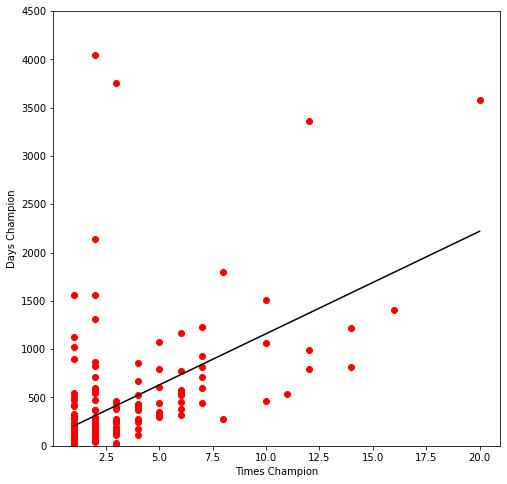

In [129]:
model = LinearRegression().fit(X, Y)

fig = plt.figure(figsize=(8,8),num=3000)
ax = fig.add_subplot()
plt.scatter(X, Y, color='r')
plt.plot(X, model.predict(X),color='k')
plt.xlabel('Times Champion')
plt.ylabel('Days Champion')
plt.ylim(0,4500)
#ax.text(10, 2000, r'LR equation: $Y = a + bX$', fontsize=10)

print("Model Coef:",model.coef_, '\n'"Model Intercept:",model.intercept_)

That looks good. Lets take another look at our data 

In [130]:
AllData2.describe()

,Total_Xs_Champion,Total_Duration_Champ
count,195.000000,195.000000
mean,2.825641,399.025641
std,3.061291,606.245913
min,1.000000,1.000000
25%,1.000000,79.500000
50%,2.000000,186.000000
75%,3.000000,450.500000
max,20.000000,4040.000000


 Our avg champ is a 3x champ for about 400 days. Let's visualize our data in a different way. It will give you a different perspective on our multi time champions and how rare they are

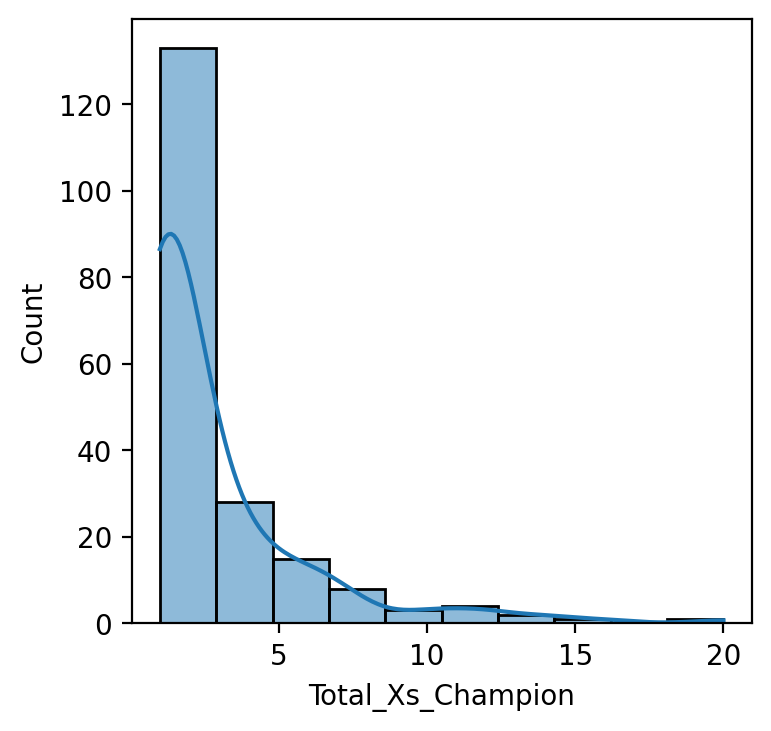

In [131]:
plt.figure(figsize=(4,4),dpi=200)
sns.histplot(data=AllData2, x='Total_Xs_Champion',bins=10,kde=True)

A 10x champ or more is pretty rare 

In [138]:
fig = px.scatter(WWEWCW,x=WWEWCW['WWEWCW_X_Champ'], y=WWEWCW['WWEWCW_Duration'],color=WWEWCW['WWEWCW_X_Champ'],symbol=WWEWCW['Champion'],trendline="ols",trendline_scope="overall",width=1200,height=400,)
fig.update_yaxes(automargin=True)
fig.update_layout(showlegend=False)
fig.show()

Let's compare our Linear Regression Model from all the data to just the WWEWCW data. Our equation here was 84.6 x the amount of times as champion + 107 days.  With all of the data our equation was 105.9 times the amount of times as champion plus 99.

###Its not exactly the same but its kind of similar .   If you notice the older generation wrestlers are the ones far above our linear regression line on both charts. Today's wrestlers and alot of the fan favories are towards the bottom right where they had more reigns but a shorter duration of time as a champion . 